In [1]:
import numpy as np
import scipy as sp
from scipy.misc import bytescale
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(threshold=np.nan) # This will allow us to print matrices in their full form

In [3]:
def createMashgrid():
    n = input("Enter number of rows of the grid ")
    n = int(n)
    m = input("Enter number of columns of the grid ")
    m = int(m)
    
    u = np.arange(n)
    v = np.arange(m)
    
    X, Y = np.meshgrid(v, u)
    return X, Y

In [4]:
X, Y = createMashgrid()
print('X\n', X, '\n\n', 'Y\n', Y)

Enter number of rows of the grid 3
Enter number of columns of the grid 7
X
 [[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]] 

 Y
 [[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]]


#### A=(-1)^(X+Y)
#### A=(-1).^(X+Y)

#### I assume that these two lines were there just to show differnce between operators "^" and ".^"

#### I wont bother to implement function of MATLAB's operator "^" since ".^" is the one that we need and python handels "^" same way MATLAB handels ".^"


In [5]:
# Element wise power
A = (-1)**(X+Y)
A

array([[ 1, -1,  1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1, -1,  1]])

In [6]:
(255*(A+1)/2).astype(np.uint8) # 8 bit representation, range(0 - 255), does not scales

array([[255,   0, 255,   0, 255,   0, 255],
       [  0, 255,   0, 255,   0, 255,   0],
       [255,   0, 255,   0, 255,   0, 255]], dtype=uint8)

In [7]:
def scale(A):
# Scales the range of the input image to (0 - 255) and converts it to uint8
# A - mxn matrix
    
    m = A.shape[0]
    n = A.shape[1]

    minEl = A[0][0]
    maxEl = A[0][0]

    for row in A:
        for element in row:
            if (element < minEl):
                minEl = element
            if (element > maxEl):
                maxEl = element

    for i in range(m):
        for j in range(n):
            A[i][j] = (A[i][j] - minEl) / (maxEl - minEl)

    A = 255 * A
    A = A.astype(np.uint8)
    
    return A

In [8]:
B = scale(A)
B

array([[255,   0, 255,   0, 255,   0, 255],
       [  0, 255,   0, 255,   0, 255,   0],
       [255,   0, 255,   0, 255,   0, 255]], dtype=uint8)

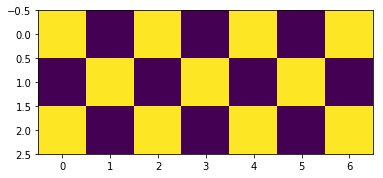

In [9]:
plt.imshow(B)
plt.show()

In [10]:
c = input("Enter the coefficient to scale with: ")
c = int(c)

Enter the coefficient to scale with: 20


In [11]:
def strechMatrix(A, c = c):
#     A - initial matrix
#     c - coefficient that represents how many times initial matrix is going to be streched

# function puts block of size cxc in the place of A[i][j]. That cxc block has all values equal to A[i][j]

    B = np.zeros([A.shape[0] * c, A.shape[1] * c])
    for i, row in enumerate(A):
        counter = 0
        for j, elem in enumerate(row):
            for k in range(c):
                B[i*c][counter] = elem
                counter += 1
        for k in range(c):
            B[i*c+k] = B[i*c]    
    return B

In [12]:
C = strechMatrix(B)
C

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255.,

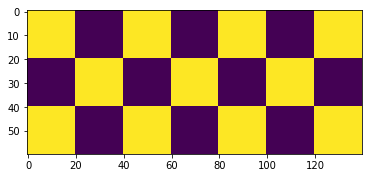

In [13]:
plt.imshow(C)
plt.show()

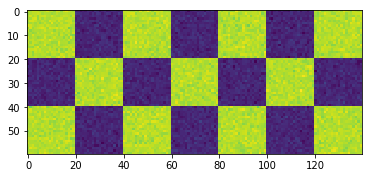

In [14]:
# Adding a random noise to image
m = C.shape[0]
n = C.shape[1]

noise = 10 * np.random.randn(m, n)

D = np.float64(C) + noise
plt.imshow(D)
plt.show()

In [15]:
def removeNoise(A, c = c):
# A - matrix with noise
# c - size of the block

# First function will calculate mean value of each block of the matrix A and store it in the new matrix (e.g. meanMatrix).
# Then meanMatrix is streached to fit dimension of the matrix A, after which its range is scaled to (0 - 255)

    m = A.shape[0]
    n = A.shape[1]

    dx = m/c # number of rows in meshgrid
    dy = n/c # number of columns in meshgrid
    
    dx = int(dx)
    dy = int(dy)

    meanMatrix = np.zeros([dx, dy])

    for i in range(dx):
        for j in range(dy):
            meanMatrix[i][j] = sum(sum(A[i*c:(i+1)*c, j*c:(j+1)*c]))
            
    meanMatrix = meanMatrix / (c**2)   
    
    # Streaching meanMatrix to fit dimensions of matrix that we want to remove noise from
    meanMatrix = strechMatrix(meanMatrix, c) 
    
    M = scale(meanMatrix)
    
    return M

In [16]:
E = removeNoise(D)
E

array([[253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 253, 253, 253],
       [253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

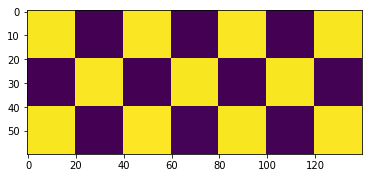

In [17]:
# We see that image with its noise removed looks the same as original image before we added the noise
plt.imshow(E)
plt.show()

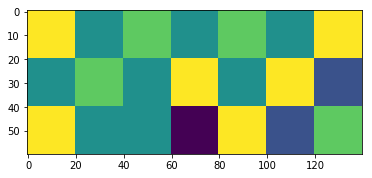

In [18]:
# But after subtrackting image with removed noise from original image, difference between these two images becomes
# apparent
plt.imshow(C - E)
plt.show()